# Etapa 3 - Implementação algoritmo de ML (Random Forest)
- Na realização dessa etapa do trabalho, escolhemos o algoritmo Random Forest para classificar as instâncias utilizadas no trabalho. Primeiramente executamos o algoritmo com a base desbalanceada, onde encontramos métricas razoáveis mas que poderiam ser melhores, e para melhorar as métricas, aplicamos o código de pré-processamento da etapa passada para analisarmos as diferenças no comportamento do treinamento do algoritmo antes e depois do pré-processamento.

# Task: 1
## - Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from math import sqrt
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Task 2:
## - Open DataFrame

In [ ]:
train_data = pd.read_csv("/content/Reviews_Classified5k.csv", delimiter = ",")
train_data = train_data.drop(columns="Unnamed: 0")
test_data = train_data

# Task 3:
## - Remove stopwords from text and create corpus

In [ ]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [ ]:
corpus= []
corpus1= []
for i in range(0, 5000):
    corpus.append(review_to_words(train_data['Text'][i]))
    corpus1.append(review_to_words(train_data['Text'][i]))
    
train_data['new_Phrase']=corpus
train_data.drop(['Text'],axis=1,inplace=True)

# Task 4:
## - Create count vectorizer for corpus

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:,1].values

# Task 5: 
## - Split Data Frame in train and test
## - Train and fit Random Forest model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

# Task 6:
## - Calculate metrics (unbalanced)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))

# Calculando as métricas: POSITIVOS
precisaoPOS = tp_pos / (tp_pos + fp_pos)
recallPOS = tp_pos / (tp_pos + fn_pos)
accuracyPOS = (tp_pos + vn_pos) / (tp_pos + fn_pos + fp_pos + vn_pos)
f1sPOS = 2 * (precisaoPOS * recallPOS) / (precisaoPOS + recallPOS)

# Calculando as métricas: NEGATIVOS
precisaoNEG = tp_neg / (tp_neg + fp_neg)
recallNEG = tp_neg / (tp_neg + fn_neg)
accuracyNEG = (tp_neg + vn_neg) / (tp_neg + fn_neg + fp_neg + vn_neg)
f1sNEG = 2 * (precisaoNEG * recallNEG) / (precisaoNEG + recallNEG)

# Calculando as métricas: NEUTROS
precisaoNEU = tp_neu / (tp_neu + fp_neu)
recallNEU = tp_neu / (tp_neu + fn_neu)
accuracyNEU = (tp_neu + vn_neu) / (tp_neu + fn_neu + fp_neu + vn_neu)
f1sNEU = 2 * (precisaoNEU * recallNEU) / (precisaoNEU + recallNEU)

VP neg:193	VP neu:80	VP pos:3856
FN neg:585	FN neu:285	FN pos:1
FP neg:1	FP neu:2	FP pos:868
VN neg:4221	VN neu:4633	VN pos:275
              precision    recall  f1-score   support

    negative       0.99      0.25      0.40       778
     neutral       0.98      0.22      0.36       365
    positive       0.82      1.00      0.90      3857

    accuracy                           0.83      5000
   macro avg       0.93      0.49      0.55      5000
weighted avg       0.86      0.83      0.78      5000



## - Display confusion matrix

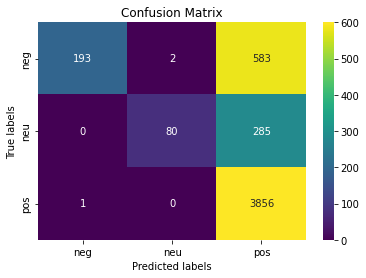

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix
cm = confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=600); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);


posNRF = f1_score(y_test, y_pred, average = 'micro')

# Task 7:
## - Open database again

In [ ]:
train_data = pd.read_csv("/content/Reviews_Classified5k.csv", delimiter = ",")
train_data = train_data.drop(columns="Unnamed: 0")
y = train_data.iloc[:,1].values
test_data = train_data

# Task 8:
## - Remove stopwords from text and create corpus

In [ ]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [ ]:
corpus= []
corpus1= []
for i in range(0, len(train_data)):
    corpus.append(review_to_words(train_data['Text'][i]))
    corpus1.append(review_to_words(train_data['Text'][i]))
    
train_data['new_Phrase']=corpus
train_data.drop(['Text'],axis=1,inplace=True)

# Task 8:
## - Create count vectorizer for corpus

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:,1].values

# Task 9: 
## - Split Data Frame in train and test
## - Balance Data Frame (OverSample)
## - Train and fit Random Forest model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

# summarize class distribution
y = train_data.iloc[:,1].values
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='not majority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
classifier.fit(X_over, y_over)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

Counter({'positive': 3857, 'negative': 778, 'neutral': 365})
Counter({'positive': 773, 'neutral': 773, 'negative': 773})


# Task 10:
## - Calculate metrics (balanced)

In [ ]:
from sklearn import metrics
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = metrics.confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))


# Calculando as métricas: POSITIVOS
BprecisaoPOS = tp_pos / (tp_pos + fp_pos)
BrecallPOS = tp_pos / (tp_pos + fn_pos)
BaccuracyPOS = (tp_pos + vn_pos) / (tp_pos + fn_pos + fp_pos + vn_pos)
Bf1sPOS = 2 * (precisaoPOS * recallPOS) / (precisaoPOS + recallPOS)

# Calculando as métricas: NEGATIVOS
BprecisaoNEG = tp_neg / (tp_neg + fp_neg)
BrecallNEG = tp_neg / (tp_neg + fn_neg)
BaccuracyNEG = (tp_neg + vn_neg) / (tp_neg + fn_neg + fp_neg + vn_neg)
Bf1sNEG = 2 * (precisaoNEG * recallNEG) / (precisaoNEG + recallNEG)

# Calculando as métricas: NEUTROS
BprecisaoNEU = tp_neu / (tp_neu + fp_neu)
BrecallNEU = tp_neu / (tp_neu + fn_neu)
BaccuracyNEU = (tp_neu + vn_neu) / (tp_neu + fn_neu + fp_neu + vn_neu)
Bf1sNEU = 2 * (precisaoNEU * recallNEU) / (precisaoNEU + recallNEU)

VP neg:276	VP neu:86	VP pos:3822
FN neg:502	FN neu:279	FN pos:35
FP neg:31	FP neu:21	FP pos:764
VN neg:4191	VN neu:4614	VN pos:379
              precision    recall  f1-score   support

    negative       0.90      0.35      0.51       778
     neutral       0.80      0.24      0.36       365
    positive       0.83      0.99      0.91      3857

    accuracy                           0.84      5000
   macro avg       0.85      0.53      0.59      5000
weighted avg       0.84      0.84      0.80      5000



## - Display confusion matrix

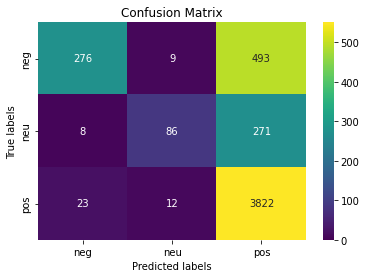

In [ ]:
cm = metrics.confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=550); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);

# Task 11:
## - Compare Results between balanced and unbalanced models

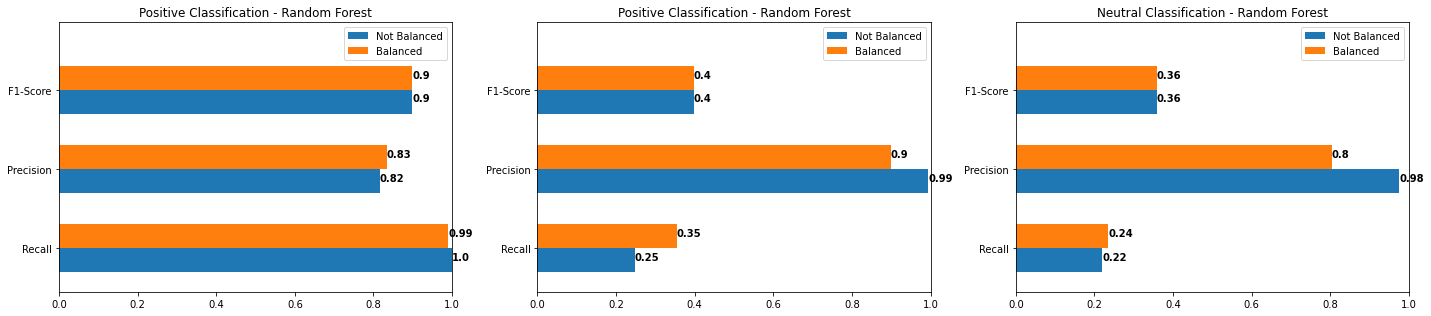

In [ ]:
fix, ax = plt.subplots(1, 3, figsize = (20, 4.5))

ind = np.array([0, 1, 2])
width = 0.3

y_axis = ['Recall', 'Precision', 'F1-Score']
x_axis_PNBRF = [recallPOS, precisaoPOS, f1sPOS]; x_axis_PBRF = [BrecallPOS, BprecisaoPOS, Bf1sPOS]
x_axis_NNBRF = [recallNEG, precisaoNEG, f1sNEG]; x_axis_NBRF = [BrecallNEG, BprecisaoNEG, Bf1sNEG]
x_axis_NENBRF = [recallNEU, precisaoNEU, f1sNEU]; x_axis_NEBRF = [BrecallNEU, BprecisaoNEU, Bf1sNEU]



ax[0].barh(ind, x_axis_PNBRF, width, label='Not Balanced')
ax[0].barh(ind+width, x_axis_PBRF, width, label='Balanced')
ax[0].set_title('Positive Classification - Random Forest')
ax[0].set_xlim(0, 1)

ax[1].barh(ind, x_axis_NNBRF, width, label='Not Balanced')
ax[1].barh(ind+width, x_axis_NBRF, width, label='Balanced')
ax[1].set_title('Positive Classification - Random Forest')
ax[1].set_xlim(0, 1)

ax[2].barh(ind, x_axis_NENBRF, width, label='Not Balanced')
ax[2].barh(ind+width, x_axis_NEBRF, width, label='Balanced')
ax[2].set_title('Neutral Classification - Random Forest')
ax[2].set_xlim(0, 1)

for i, v in enumerate(x_axis_PNBRF):
    ax[0].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')

for i, v in enumerate(x_axis_NNBRF):
    ax[1].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')

for i, v in enumerate(x_axis_NENBRF):
    ax[2].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')

  
for i, v in enumerate(x_axis_PBRF):
    ax[0].text(v, i+width, str(round(v,2)), color = 'black', fontweight = 'bold')

for i, v in enumerate(x_axis_NBRF):
    ax[1].text(v, i+width, str(round(v,2)), color = 'black', fontweight = 'bold')
    
for i, v in enumerate(x_axis_NEBRF):
    ax[2].text(v, i+width, str(round(v,2)), color = 'black', fontweight = 'bold')

ax[0].set(yticks=ind + width/2, yticklabels=np.array(['Recall', 'Precision', 'F1-Score']),ylim=[2*width - 1, len(ind)])
ax[1].set(yticks=ind + width/2, yticklabels=np.array(['Recall', 'Precision', 'F1-Score']),ylim=[2*width - 1, len(ind)])
ax[2].set(yticks=ind + width/2, yticklabels=np.array(['Recall', 'Precision', 'F1-Score']),ylim=[2*width - 1, len(ind)])

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')

plt.tight_layout()
plt.show()


# Task 12:
## - Compare Score with Classification

In [ ]:
positive_b = []; negative_b = []; neutral_b = []

for xs, i in enumerate(y_real_pred):
  if i == 'neutral':
    neutral_b.append(train_data.iloc[xs, 7])
  elif i == 'negative':
    negative_b.append(train_data.iloc[xs, 7])
  else:
    positive_b.append(train_data.iloc[xs, 7])

positive = train_data['Score'].loc[train_data['Classification'] == 'positive']
negative = train_data['Score'].loc[train_data['Classification'] == 'negative']
neutral  = train_data['Score'].loc[train_data['Classification'] == 'neutral']

pos_b = []
neg_b = []
neu_b = []

for i in range(1, 6):
    pos_b.append(positive_b.count(i))

for i in range(1, 6):
  neg_b.append(negative_b.count(i))

for i in range(1, 6):
  neu_b.append(neutral_b.count(i))

##########################################################

pos = []
neg = []
neu = []

for ele in reversed(list(positive.value_counts())):
  pos.append(ele)

for ele in reversed(list(negative.value_counts())):
  neg.append(ele)

for ele in reversed(list(neutral.value_counts())):
  neu.append(ele)

aux = [1,2,3,4,5]

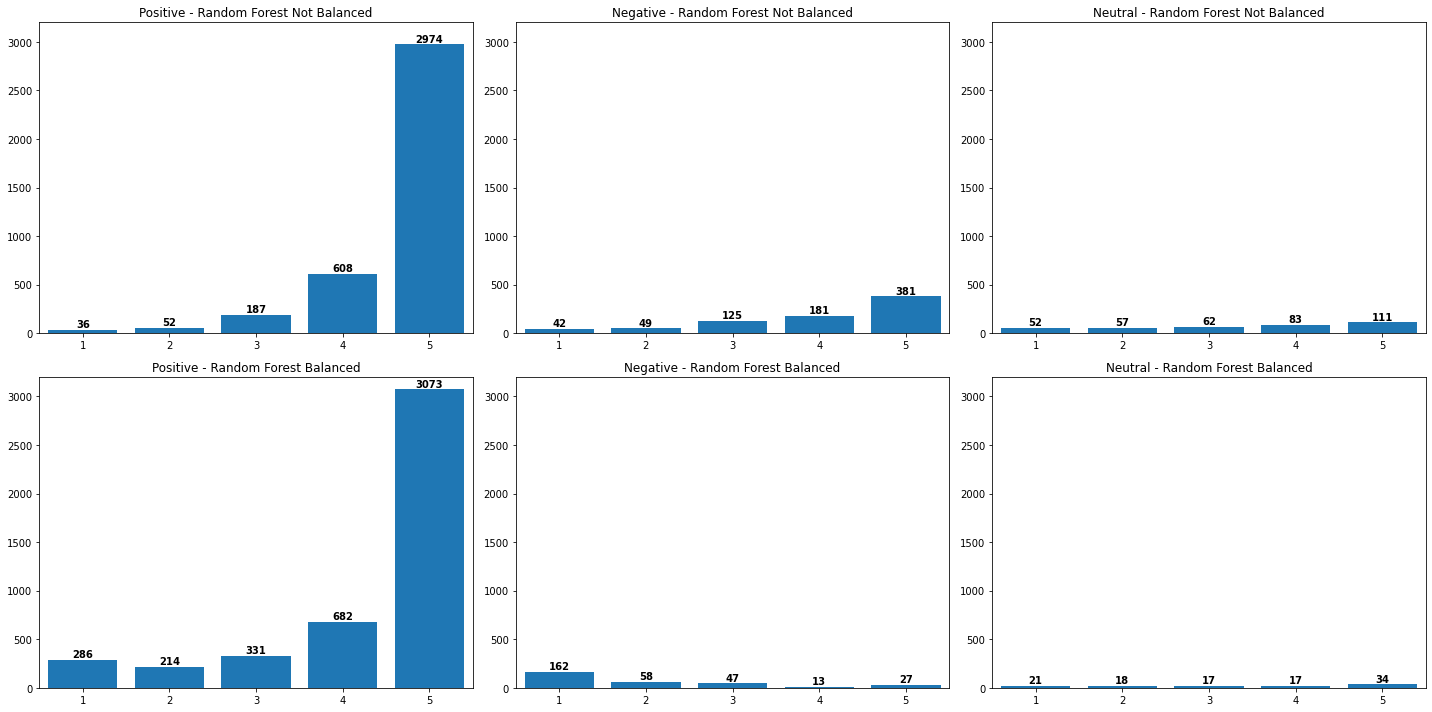

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0,0].bar(aux, pos)
ax[0,0].set_title('Positive - Random Forest Not Balanced')
ax[0,0].set_xlim(0.5, 5.5)
ax[0,0].set_ylim(0.0, 3200.0)

ax[0,1].bar(aux, neg)
ax[0,1].set_title('Negative - Random Forest Not Balanced')
ax[0,1].set_xlim(0.5, 5.5)
ax[0,1].set_ylim(0.0, 3200.0)

ax[0,2].bar(aux, neu)
ax[0,2].set_title('Neutral - Random Forest Not Balanced')
ax[0,2].set_xlim(0.5, 5.5)
ax[0,2].set_ylim(0.0, 3200.0)

# Make some labels.
rects = ax[0,0].patches
labels = [f"{i}" for i in pos]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0,0].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[0,1].patches
labels = [f"{i}" for i in neg]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0,1].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[0,2].patches
labels = [f"{i}" for i in neu]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0,2].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

##################################################################

ax[1,0].bar(aux, pos_b)
ax[1,0].set_title('Positive - Random Forest Balanced')
ax[1,0].set_xlim(0.5, 5.5)
ax[1,0].set_ylim(0.0, 3200.0)

ax[1,1].bar(aux, neg_b)
ax[1,1].set_title('Negative - Random Forest Balanced')
ax[1,1].set_xlim(0.5, 5.5)
ax[1,1].set_ylim(0.0, 3200.0)

ax[1,2].bar(aux, neu_b)
ax[1,2].set_title('Neutral - Random Forest Balanced')
ax[1,2].set_xlim(0.5, 5.5)
ax[1,2].set_ylim(0.0, 3200.0)

# Make some labels.
rects = ax[1,0].patches
labels = [f"{i}" for i in pos_b]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[1,0].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[1,1].patches
labels = [f"{i}" for i in neg_b]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[1,1].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[1,2].patches
labels = [f"{i}" for i in neu_b]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[1,2].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

plt.tight_layout()
plt.show()